In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Decimate by N

In [593]:
def plot_decimate_by_N(N,fsample=192000):
    bt=np.genfromtxt('build/TXDecimateBy%d_original_IQ.txt'%N,delimiter=",")
    at1=np.genfromtxt('build/TXDecimateBy%d_decimated_IQ_pass1.txt'%N,delimiter=",")
    at2=np.genfromtxt('build/TXDecimateBy%d_decimated_IQ_pass2.txt'%N,delimiter=",")
    fb,Pb = welch(bt[:,1]+1j*bt[:,2],fs=fsample,return_onesided=False)
    fa,Pa = welch(at2[:,1]+1j*at2[:,2],fs=fsample/N,return_onesided=False)

    plt.figure(figsize=(14,10))
    plt.subplot(2,2,1)
    plt.plot(bt[:,0],bt[:,1]+0.5,'k-',label='I+0.5')
    plt.plot(bt[:,0],bt[:,2]-0.5,'r-',label='Q-0.5')
    #plt.xlim([0,300])
    plt.grid()
    plt.legend()
    plt.title("Before decimation")

    plt.subplot(2,2,2)
    plt.plot(at1[:,0],at1[:,1]+0.5,'k-',label='I+0.5')
    plt.plot(at1[:,0],at1[:,2]-0.5,'r-',label='Q-0.5')
    plt.plot(at2[:,0]+at1.shape[0],at2[:,1]+0.5,'k-')
    plt.plot(at2[:,0]+at1.shape[0],at2[:,2]-0.5,'r-')
    plt.xlim([at1.shape[0]-100,at1.shape[0]+100])
    plt.grid()
    plt.legend()
    plt.title("After decimation by %d"%N)

    plt.subplot(2,2,3)
    plt.plot(np.fft.fftshift(fb),10*np.log10(np.fft.fftshift(Pb)),'k-')
    plt.grid()
    Im = np.argmax(Pb)
    plt.title("Max %5.4f at f[%d]=%2.1fHz"%(10*np.log10(Pb[Im]),Im,fb[Im]))

    plt.subplot(2,2,4)
    plt.plot(np.fft.fftshift(fa),10*np.log10(np.fft.fftshift(Pa)),'k-')
    plt.grid()
    Im = np.argmax(Pa)
    plt.title("Max %5.4f at f[%d]=%2.1fHz"%(10*np.log10(Pa[Im]),Im,fa[Im]))
    plt.text(fa[Im+5],10*np.log10(Pa[Im]),"Peak-floor=%2.1f"%(10*np.log10(Pa[Im])-10*np.log10(Pa[Im-10])))

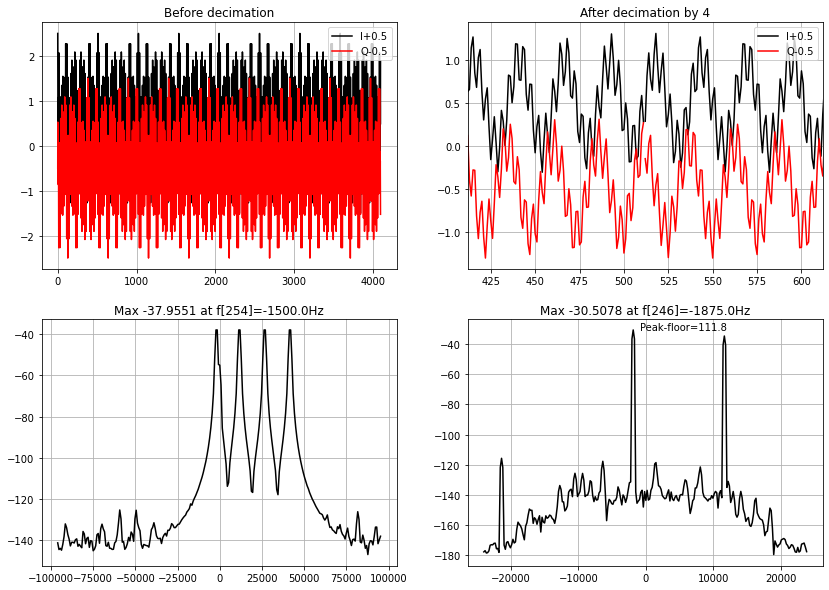

In [594]:
plot_decimate_by_N(4)

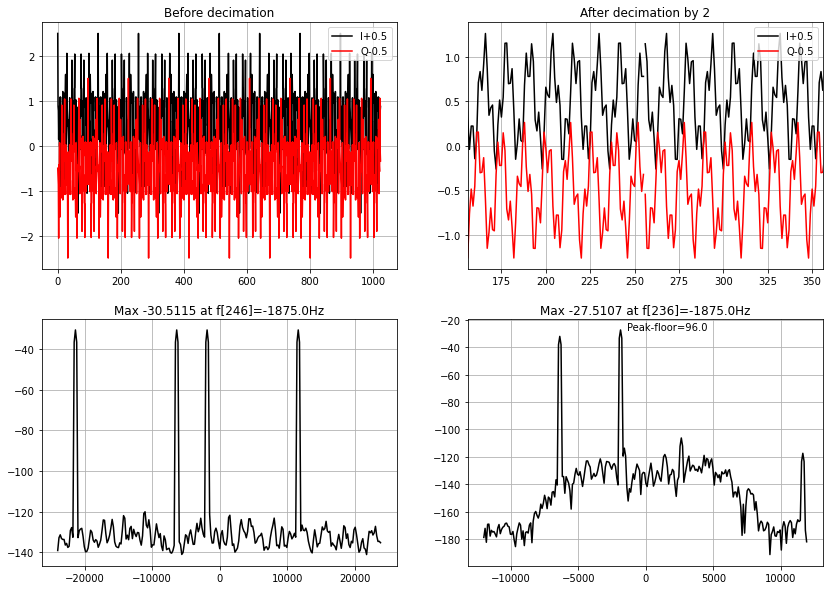

In [595]:
plot_decimate_by_N(2,fsample=192000/4)

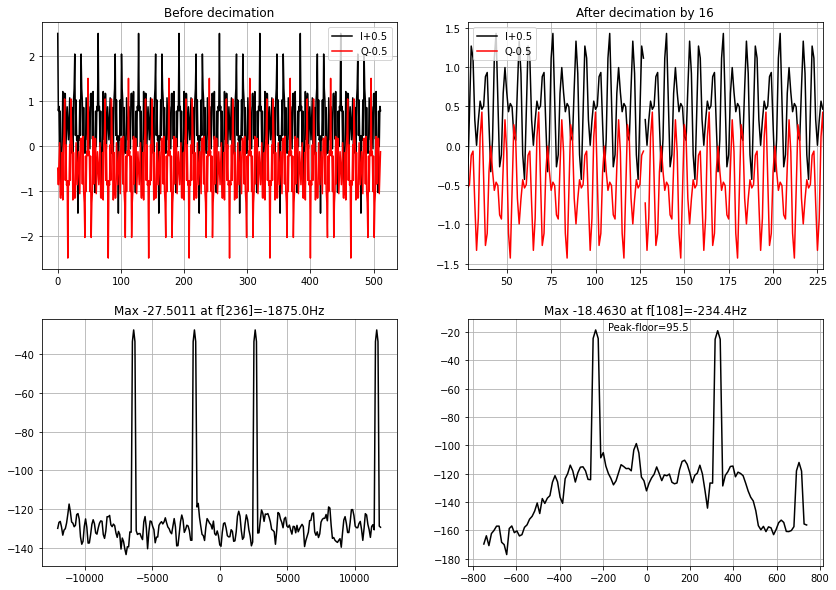

In [596]:
plot_decimate_by_N(16,fsample=192000/8)

Text(0.5, 1.0, 'Corrected Transmit FIR Filter Responses')

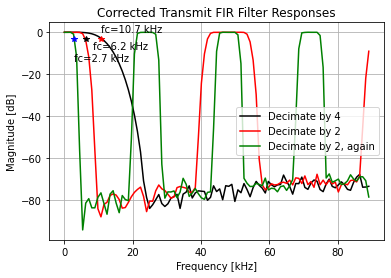

In [597]:
fpb4 = np.genfromtxt('build/TXDecimateBy4_passband.txt',delimiter=",")
fpb2 = np.genfromtxt('build/TXDecimateBy2_passband.txt',delimiter=",")
fpb2x2 = np.genfromtxt('build/TXDecimateBy2x2_passband.txt',delimiter=",")

I3dB = np.argmin(np.abs(20*np.log10(fpb4[:,2]) - -3.01))
I3dB2 = np.argmin(np.abs(20*np.log10(fpb2[:20,2]) - -3.01))
I3dB2x2 = np.argmin(np.abs(20*np.log10(fpb2x2[:20,2]) - -3.01))

plt.figure(facecolor='white')
plt.plot(fpb4[:,1]/1000,20*np.log10(fpb4[:,2]),'k-',label='Decimate by 4')
plt.plot(fpb4[I3dB,1]/1000,-3.01,'r*')
plt.text(fpb4[I3dB,1]/1000,0,'fc=%2.1f kHz'%(fpb4[I3dB,1]/1000))

plt.plot(fpb2[:,1]/1000,20*np.log10(fpb2[:,2]),'r-',label='Decimate by 2')
plt.plot(fpb2[I3dB2,1]/1000,-3.01,'k*')
plt.text(fpb2[I3dB2,1]/1000+2,-8,'fc=%2.1f kHz'%(fpb2[I3dB2,1]/1000))

plt.plot(fpb2x2[:,1]/1000,20*np.log10(fpb2x2[:,2]),'g-',label='Decimate by 2, again')
plt.plot(fpb2x2[I3dB2x2,1]/1000,-3.01,'b*')
plt.text(fpb2x2[I3dB2x2,1]/1000,-14,'fc=%2.1f kHz'%(fpb2x2[I3dB2x2,1]/1000))


#plt.xlim([0,48000/1000])
plt.grid()
plt.legend()
plt.xlabel("Frequency [kHz]")
plt.ylabel("Magnitude [dB]")
plt.title("Corrected Transmit FIR Filter Responses")

# Transmit EQ

Text(0.5, 1.0, 'Transmit EQ filter')

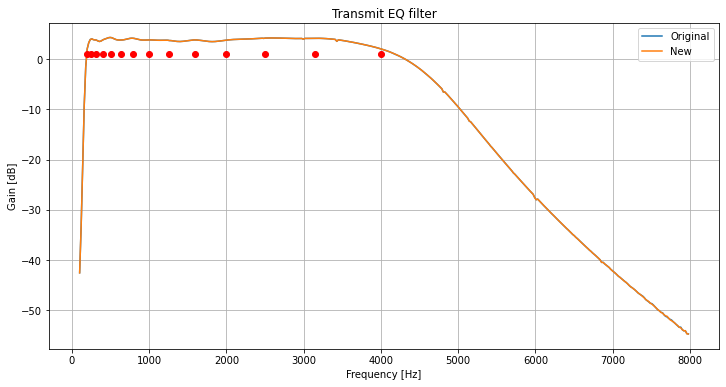

In [598]:
fc = [198.425,250,314.98,400,500,630,793,1000,1259,1587,2000,2500,3150,4000]

plt.figure(figsize=(12,6),facecolor='white')
am = np.genfromtxt('build/TransmitEQ_orig.txt',delimiter=",")
bm = np.genfromtxt('build/TransmitEQ_new.txt',delimiter=",")

plt.plot(am[:,1],20*np.log10(am[:,2]),label="Original")
plt.plot(bm[:,1],20*np.log10(bm[:,2]),label="New")
for k in range(14):
    plt.plot(fc[k],1,'ro')


#plt.loglog()
plt.grid()
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel("Gain [dB]")
plt.title("Transmit EQ filter")


# Interpolate

In [599]:
def plot_interpolate_by_N(N,fsample=192000,fname=None):
    if fname is None:
        fname = 'TXInterpolateBy%d'%N
    else:
        fname = fname%N
    bt=np.genfromtxt('build/'+fname+'_original_IQ.txt',delimiter=",")
    at1=np.genfromtxt('build/'+fname+'_interpolated_IQ_pass1.txt',delimiter=",")
    at2=np.genfromtxt('build/'+fname+'_interpolated_IQ_pass2.txt',delimiter=",")
    
    fb,Pb = welch(bt[:,1]+1j*bt[:,2],fs=fsample,return_onesided=False)
    fa,Pa = welch(at2[:,1]+1j*at2[:,2],fs=fsample*N,return_onesided=False)

    plt.figure(figsize=(14,10),facecolor='white')
    plt.subplot(2,2,1)
    plt.plot(bt[:,0],bt[:,1]+0.5,'k-',label='I+0.5')
    plt.plot(bt[:,0],bt[:,2]-0.5,'r-',label='Q-0.5')
    #plt.xlim([0,300])
    plt.grid()
    plt.legend()
    plt.title("Before interpolation")

    plt.subplot(2,2,2)
    plt.plot(at1[:,0],at1[:,1]+0.5,'k-',label='I+0.5')
    plt.plot(at1[:,0],at1[:,2]-0.5,'r-',label='Q-0.5')
    plt.plot(at2[:,0]+at1.shape[0],at2[:,1]+0.5,'k-')
    plt.plot(at2[:,0]+at1.shape[0],at2[:,2]-0.5,'r-')
    plt.xlim([at1.shape[0]-100,at1.shape[0]+100])
    plt.grid()
    plt.legend()
    plt.title("After interpolation by %d"%N)

    plt.subplot(2,2,3)
    plt.plot(np.fft.fftshift(fb),10*np.log10(np.fft.fftshift(Pb)),'k-')
    plt.grid()
    Im = np.argmax(Pb)
    plt.title("Max %5.4f at f[%d]=%2.1fHz"%(10*np.log10(Pb[Im]),Im,fb[Im]))

    plt.subplot(2,2,4)
    plt.plot(np.fft.fftshift(fa),10*np.log10(np.fft.fftshift(Pa)),'k-')
    plt.grid()
    Im = np.argmax(Pa)
    plt.title("Max %5.4f at f[%d]=%2.1fHz"%(10*np.log10(Pa[Im]),Im,fa[Im]))
    plt.text(fa[Im+5],10*np.log10(Pa[Im]),"Peak-floor=%2.1f"%(10*np.log10(Pa[Im])-10*np.log10(Pa[Im-10])))
    
    
    fpb = np.genfromtxt('build/'+fname+'_passband.txt',delimiter=",")
    plt.figure(facecolor='white')
    plt.plot(fpb[:,1]/1000,20*np.log10(fpb[:,2]),'k-',label='Interpolate by %d'%N)
    
    if fsample==12000:
        Ibelow1 = fpb[:,1] < 6000
    if fsample==24000:
        Ibelow1 = fpb[:,1] < 12000
    if fsample==48000:
        Ibelow1 = fpb[:,1] < 24000
    
    Iabove1 = (fpb[:,1] > 1000) & (fpb[:,1] < 12000)
    db_from_3 = np.abs(20*np.log10(fpb[:,2]) - (-3.01))
    I3dB = np.argmin(db_from_3[Ibelow1])
    #I3dB = np.argmin(np.abs(20*np.log10(fpb[:,2]) - -3.01))
    plt.plot(fpb[I3dB,1]/1000,-3.01,'r*')
    plt.text(fpb[I3dB,1]/1000,0,'fc=%2.1f kHz'%(fpb[I3dB,1]/1000))

    
    plt.grid()
    #plt.legend()
    plt.xlabel("Frequency [kHz]")
    plt.ylabel("Magnitude [dB]")
    plt.title('Interpolate by %d'%N)

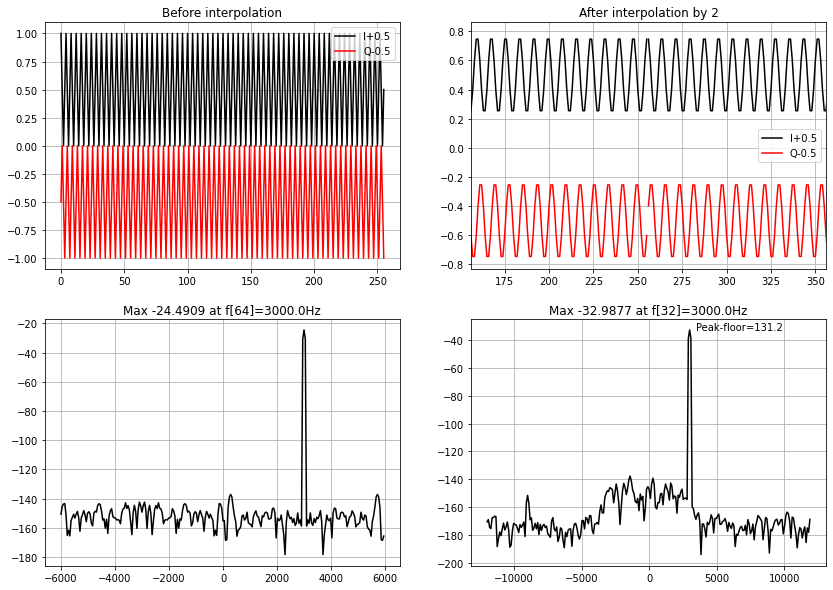

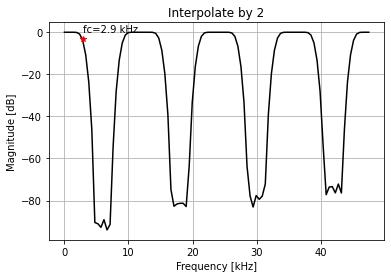

In [600]:
plot_interpolate_by_N(2,fsample=12000,fname='TXInterpolateBy%dx2')

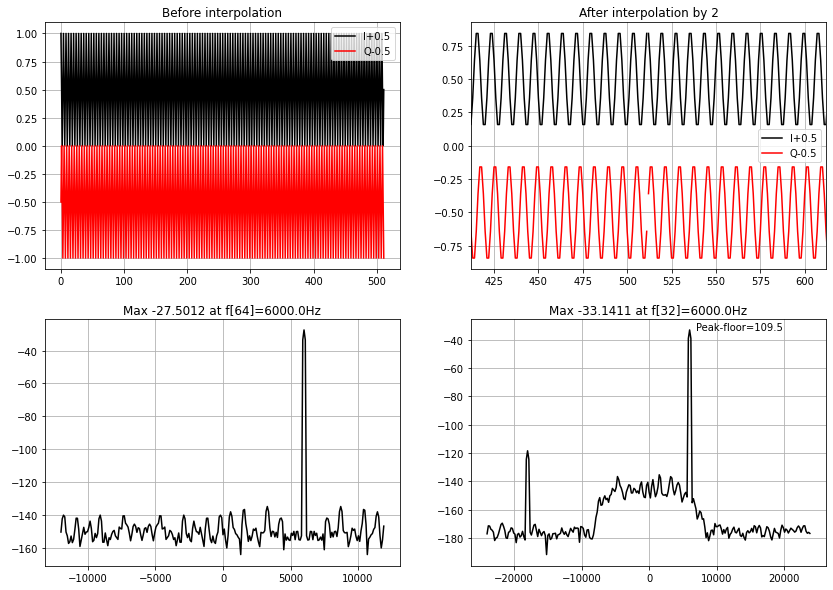

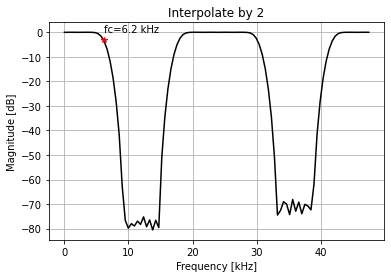

In [601]:
plot_interpolate_by_N(2,fsample=24000,fname='TXInterpolateBy%d')

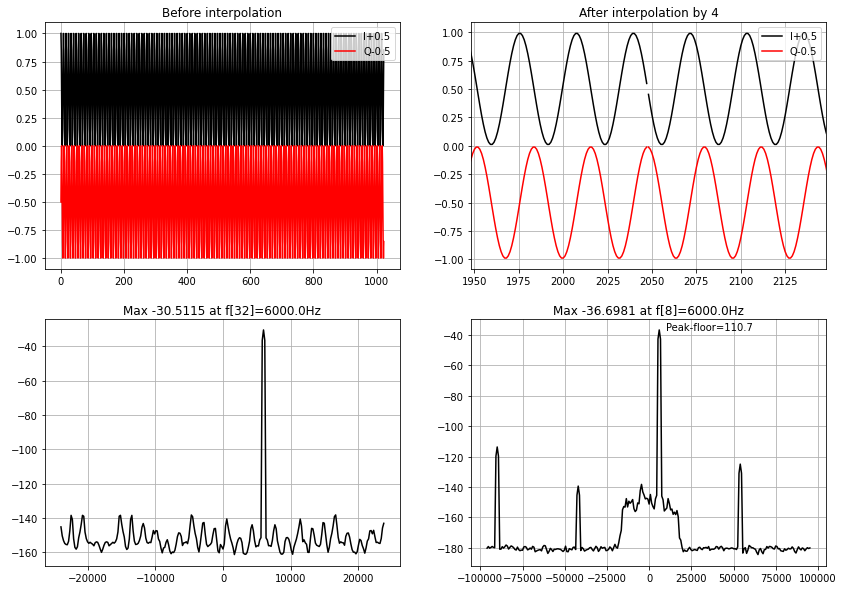

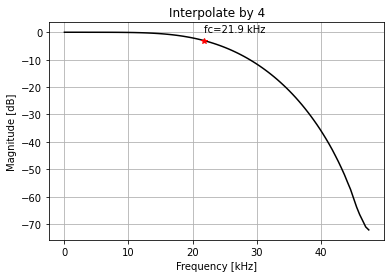

In [602]:
plot_interpolate_by_N(4,fsample=48000,fname='TXInterpolateBy%d')

# End to end passband

/tmp/ipykernel_862591/139903705.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(fpb[:,1]/1000,20*np.log10(fpb[:,2]),'k-')
/tmp/ipykernel_862591/139903705.py:4: RuntimeWarning: divide by zero encountered in log10
  maxx = np.max(20*np.log10(fpb[:,2]))
/tmp/ipykernel_862591/139903705.py:9: RuntimeWarning: divide by zero encountered in log10
  db_from_3 = np.abs(20*np.log10(fpb[:,2]) - (maxx-3.01))


Text(0.5, 1.0, 'Transmitted power')

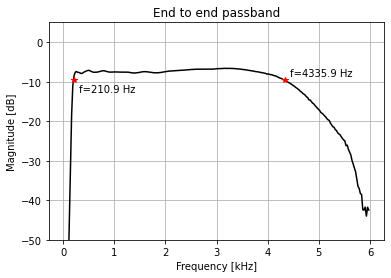

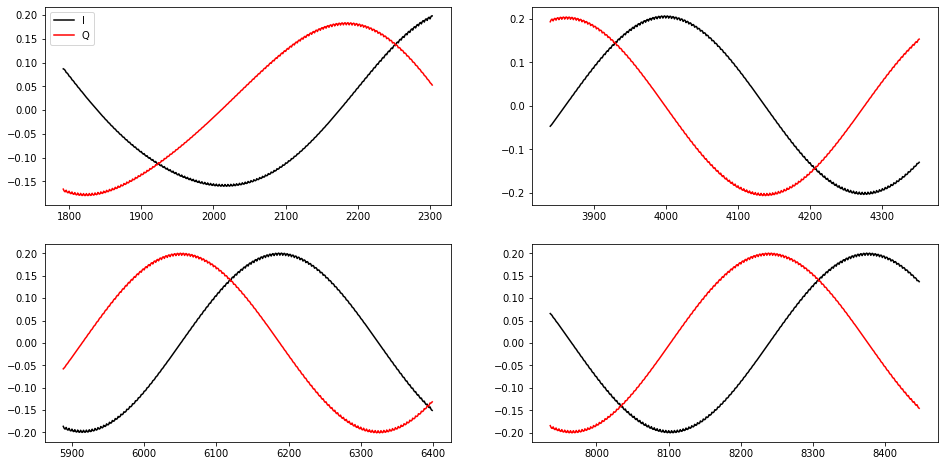

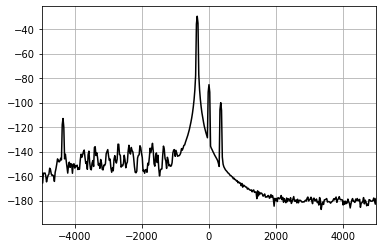

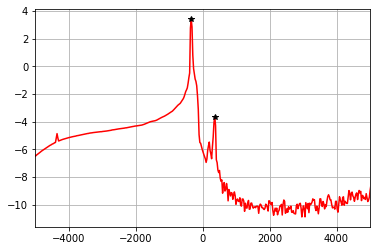

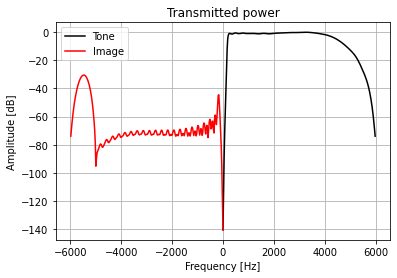

In [685]:
fpb = np.genfromtxt('build/TXEndToEnd_passband.txt',delimiter=",")
plt.figure(facecolor='white')
plt.plot(fpb[:,1]/1000,20*np.log10(fpb[:,2]),'k-')
maxx = np.max(20*np.log10(fpb[:,2]))

# Find the point below 1 kHz that is closest
Ibelow1 = fpb[:,1] < 1000
Iabove1 = (fpb[:,1] > 1000) & (fpb[:,1] < 12000)
db_from_3 = np.abs(20*np.log10(fpb[:,2]) - (maxx-3.01))

I3dB1 = np.argmin(db_from_3[Ibelow1])
I3dB2 = np.argmin(db_from_3[Iabove1])+np.arange(fpb.shape[0])[Iabove1][0]

#plt.plot([0,4],[maxx-3.01,maxx-3.01],'r-')
plt.plot(fpb[I3dB1,1]/1000,maxx-3.01,'r*')
plt.text(fpb[I3dB1,1]/1000+0.1,maxx-3.01-3,'f=%2.1f Hz'%(fpb[I3dB1,1]))
plt.plot(fpb[I3dB2,1]/1000,maxx-3.01,'r*')
plt.text(fpb[I3dB2,1]/1000+0.1,maxx-3.01+1.0,'f=%2.1f Hz'%(fpb[I3dB2,1]))

#plt.legend()
plt.xlabel("Frequency [kHz]")
plt.ylabel("Magnitude [dB]")
plt.title('End to end passband')
#plt.xlim([0,8])
plt.ylim([-50,5])
plt.grid()

fa = np.genfromtxt('build/TXEndToEnd_IQ.txt',delimiter=",")
plt.figure(figsize=(16,8),facecolor='white')
for k in range(1,5):
    plt.subplot(2,2,k)
    N = 2048*k
    plt.plot(fa[(N-256):(N+256),0],fa[(N-256):(N+256),1],'k-',label='I')
    plt.plot(fa[(N-256):(N+256),0],fa[(N-256):(N+256),2],'r-',label='Q')
    if k == 1:
        plt.legend()


d = fa[:,1] + 1j*fa[:,2]
fb,Pb = welch(d[8192:],fs=192000,nperseg=8192,return_onesided=False)

plt.figure(facecolor='white')
plt.plot(np.fft.fftshift(fb),10*np.log10(np.fft.fftshift(Pb)),'k-')
plt.xlim([-5000,5000])
plt.grid()

psd = np.genfromtxt('build/TXEndToEnd_psd.txt',delimiter=",")
bandwidth = 192000 / 16
binwidth = bandwidth / 512
fcenter = np.arange(512)*binwidth-bandwidth/2+binwidth/2
fstart = np.arange(512)*binwidth-bandwidth/2
fend = np.arange(512)*binwidth-bandwidth/2+binwidth

plt.figure(facecolor='white')
plt.plot(fcenter,psd[:,1],'r-')
plt.plot(fcenter[271],psd[271,1],'k*')
plt.plot(fcenter[256-(271-256)],psd[256-(271-256),1],'k*')
plt.xlim([-5000,5000])
plt.grid()


#sbs = np.genfromtxt('build/TXEndToEnd_sidebandseparation.txt',delimiter=",")
#plt.figure(facecolor='white')
#plt.plot(sbs[:,1],10*sbs[:,2],'k-')
##plt.xlim([-5000,5000])
#plt.grid()
#plt.xlabel("Frequency [Hz]")
#plt.ylabel("Sideband Separation [dB]")

tone = np.genfromtxt('build/TXEndToEnd_tone.txt',delimiter=",")
image = np.genfromtxt('build/TXEndToEnd_image.txt',delimiter=",")
plt.figure(facecolor='white')
plt.plot(tone[:,1],10*(tone[:,2]-np.max(tone[:,2])),'k-',label='Tone')
plt.plot(-image[:,1],10*(image[:,2]-np.max(tone[:,2])),'r-',label='Image')
plt.legend()
#plt.xlim([-5000,5000])
plt.grid()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [dB]")
plt.title("Transmitted power")

# Two tone

Text(0, 0.5, 'Amplitude [dB]')

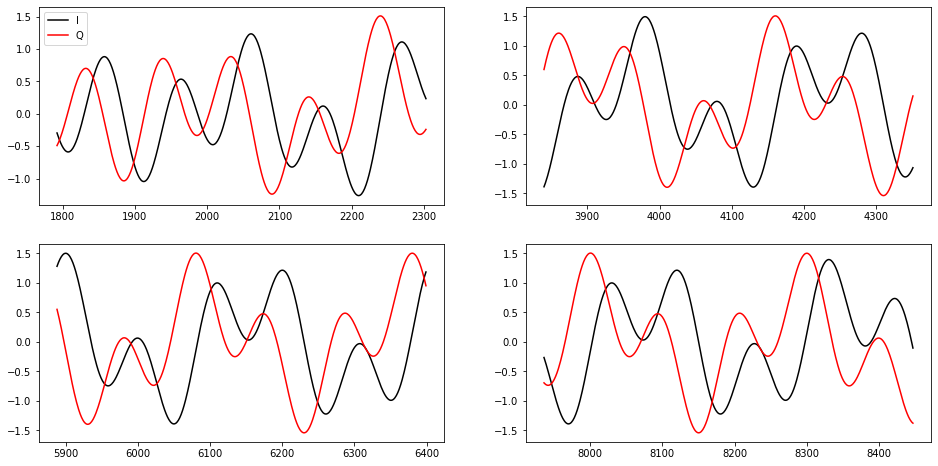

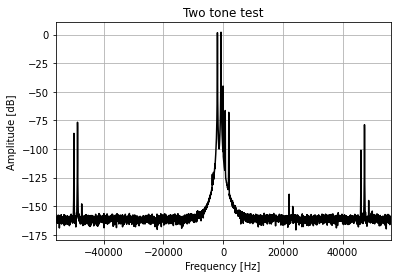

In [684]:
fa = np.genfromtxt('build/TXTwoTone_IQ.txt',delimiter=",")
plt.figure(figsize=(16,8),facecolor='white')
for k in range(1,5):
    plt.subplot(2,2,k)
    N = 2048*k
    plt.plot(fa[(N-256):(N+256),0],fa[(N-256):(N+256),1],'k-',label='I')
    plt.plot(fa[(N-256):(N+256),0],fa[(N-256):(N+256),2],'r-',label='Q')
    if k == 1:
        plt.legend()

d = fa[:,1] + 1j*fa[:,2]
fb,Pb = welch(d[8192:],fs=192000,nperseg=8192,return_onesided=False)
psd = np.genfromtxt('build/TXTwoTone_psd.txt',delimiter=",")
plt.figure(facecolor='white')
#plt.plot(psd[:,0],psd[:,1],'k-')
plt.plot(np.fft.fftshift(fb),10*np.log10(np.fft.fftshift(Pb*np.sqrt(len(fb)))),'k-')
plt.xlim([-56000,56000])
plt.grid()
plt.title("Two tone test")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [dB]")

# Hilbert

Text(0.5, 1.0, 'Hilbert Transform')

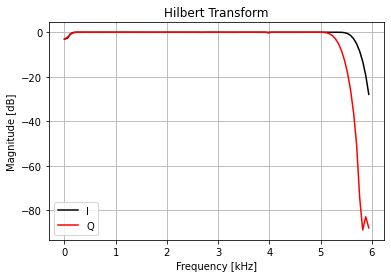

In [613]:
fpbhI = np.genfromtxt('build/TXHilbertI_passband.txt',delimiter=",")
fpbhQ = np.genfromtxt('build/TXHilbertQ_passband.txt',delimiter=",")

plt.figure(facecolor='white')
plt.plot(fpbhI[:,1]/1000,20*np.log10(fpbhI[:,2]),'k-',label='I')
plt.plot(fpbhQ[:,1]/1000,20*np.log10(fpbhQ[:,2]),'r-',label='Q')
plt.grid()
plt.legend()
plt.xlabel("Frequency [kHz]")
plt.ylabel("Magnitude [dB]")
plt.title("Hilbert Transform")


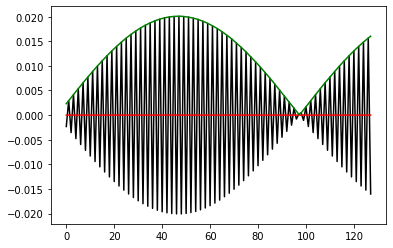

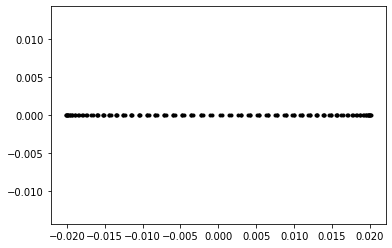

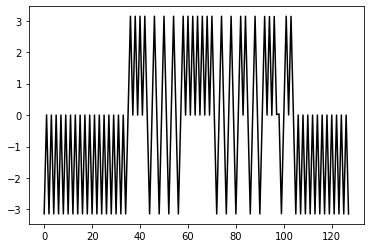

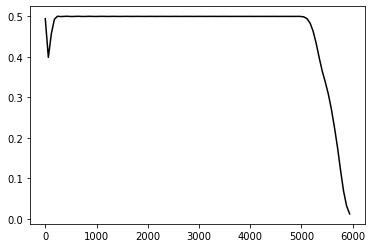

In [409]:
hiq = np.genfromtxt('build/TXHilbert_post_IQ.txt',delimiter=",")
plt.figure(facecolor='white')
plt.plot(hiq[:,0],hiq[:,1],'k-')
plt.plot(hiq[:,0],hiq[:,2],'r-')
plt.plot(hiq[:,0],np.sqrt(hiq[:,1]**2+hiq[:,2]**2),'g-')

#plt.xlim([0,40])

plt.figure(facecolor='white')
plt.plot(hiq[:,1],hiq[:,2],'k.')
plt.axis('equal')

ang = np.genfromtxt('build/TXHilbert_angle.txt',delimiter=",")
plt.figure(facecolor='white')
plt.plot(ang[:,0],ang[:,1],'k-')


mag = np.genfromtxt('build/TXHilbertIQ_mag.txt',delimiter=",")
plt.figure(facecolor='white')
plt.plot(mag[:,1],mag[:,2],'k-')


In [86]:
coeffs48K_8K_LPF_FIR = np.array([
  42.07251256297374200E-6,
  -140.7585461814297220E-6,
  -474.6573692370658360E-6,
  -910.1877217000583190E-6,
  -0.001002380560950271,
  -214.0330069096950180E-6,
  0.001476493526486391,
  0.003032917910844886,
  0.002651184249675911,
  -799.0261189923908200E-6,
  -0.006003327154821903,
  -0.008881895242516839,
  -0.005014510701112499,
  0.006071336723217765,
  0.018084892184059984,
  0.020179984097194015,
  0.004666151232929589,
  -0.024269532666953794,
  -0.047977714295749374,
  -0.041374408930560248,
  0.011283003090050767,
  0.102653022828769605,
  0.201046155814701449,
  0.264813622122047398,
  0.264813622122047398,
  0.201046155814701449,
  0.102653022828769605,
  0.011283003090050767,
  -0.041374408930560248,
  -0.047977714295749374,
  -0.024269532666953794,
  0.004666151232929589,
  0.020179984097194015,
  0.018084892184059984,
  0.006071336723217765,
  -0.005014510701112499,
  -0.008881895242516839,
  -0.006003327154821903,
  -799.0261189923908200E-6,
  0.002651184249675911,
  0.003032917910844886,
  0.001476493526486391,
  -214.0330069096950180E-6,
  -0.001002380560950271,
  -910.1877217000583190E-6,
  -474.6573692370658360E-6,
  -140.7585461814297220E-6,
  42.07251256297374200E-6
])

coeffs192K_10K_LPF_FIR = np.array([
  -9.489855110236549150E-6,
  162.0562443716462440E-6,
  336.4923361276530040E-6,
  670.1825668306562420E-6,
  0.001118525968862066,
  0.001579147826767285,
  0.001852971855408917,
  0.001654834862116168,
  672.0062171704363440E-6,
  -0.001330388414656256,
  -0.004370672204695505,
  -0.008116214105266742,
  -0.011801558382590140,
  -0.014244430060197440,
  -0.013991286573630231,
  -0.009591314629104829,
  55.15979573749079630E-6,
  0.015330868054737832,
  0.035648433279783398,
  0.059353733010970522,
  0.083890755684744231,
  0.106176326681328731,
  0.123138113118064343,
  0.132306356993624447,
  0.132306356993624447,
  0.123138113118064343,
  0.106176326681328731,
  0.083890755684744231,
  0.059353733010970522,
  0.035648433279783398,
  0.015330868054737832,
  55.15979573749079630E-6,
  -0.009591314629104829,
  -0.013991286573630231,
  -0.014244430060197440,
  -0.011801558382590140,
  -0.008116214105266742,
  -0.004370672204695505,
  -0.001330388414656256,
  672.0062171704363440E-6,
  0.001654834862116168,
  0.001852971855408917,
  0.001579147826767285,
  0.001118525968862066,
  670.1825668306562420E-6,
  336.4923361276530040E-6,
  162.0562443716462440E-6,
  -9.489855110236549150E-6
])

In [88]:
len(coeffs192K_10K_LPF_FIR)

48

In [89]:
len(coeffs48K_8K_LPF_FIR)

48

Text(0.5, 1.0, 'Decimate by 2')

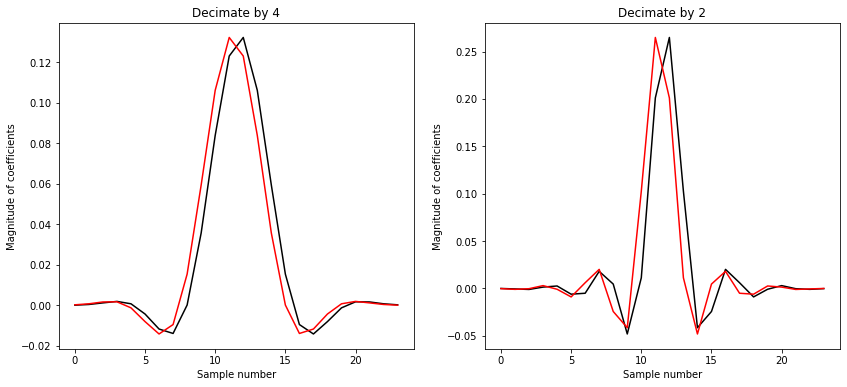

In [90]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(coeffs192K_10K_LPF_FIR[0::2],'k-')
plt.plot(coeffs192K_10K_LPF_FIR[1::2],'r-')
plt.xlabel('Sample number')
plt.ylabel("Magnitude of coefficients")
plt.title("Decimate by 4")

plt.subplot(1,2,2)
plt.plot(coeffs48K_8K_LPF_FIR[0::2],'k-')
plt.plot(coeffs48K_8K_LPF_FIR[1::2],'r-')
plt.xlabel('Sample number')
plt.ylabel("Magnitude of coefficients")
plt.title("Decimate by 2")

# Filter reconstruction

In [130]:
import scipy.signal as signal

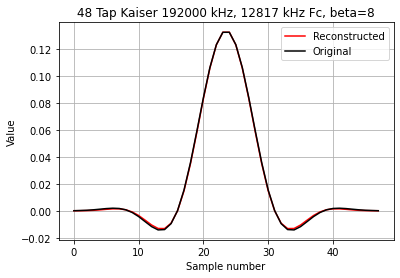

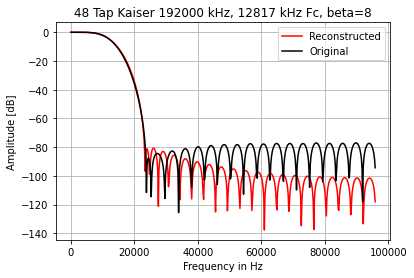

In [240]:
# 48 Tap Kaiser 192KHz 10HKZ Fc filters Dec and Interpolation
ntaps = 48
#fc = 10000
fc = 8000*np.pi/2*1.02
window = 'kaiser'
fs = 192000
M = 48
beta = 8
pp = signal.firwin(ntaps,fc,width=None,window=(window,beta),fs=fs)
w, h = signal.freqz(pp)
wo, ho = signal.freqz(coeffs192K_10K_LPF_FIR)

plt.figure()
plt.plot(pp,'r-',label='Reconstructed')
plt.plot(coeffs192K_10K_LPF_FIR,'k-',label='Original')
plt.legend()
plt.xlabel("Sample number")
plt.ylabel("Value")
#plt.title("48 Tap Kaiser 192KHz 10HKZ Fc filters")
plt.title("%d Tap Kaiser %d kHz, %d kHz Fc, beta=%d"%(ntaps,fs,fc,beta))
plt.grid()

plt.figure()
plt.plot(w/2/np.pi*fs, 20 * np.log10(abs(h)), 'r-',label='Reconstructed')
plt.plot(wo/2/np.pi*fs, 20 * np.log10(abs(ho)), 'k-',label='Original')
plt.legend()
plt.xlabel("Frequency in Hz")
plt.ylabel("Amplitude [dB]")
#plt.title("48 Tap Kaiser 192KHz 10HKZ Fc filters")
plt.title("%d Tap Kaiser %d kHz, %d kHz Fc, beta=%d"%(ntaps,fs,fc,beta))
plt.grid()
#plt.xlim([5000,15000])
#plt.ylim([0,-10])

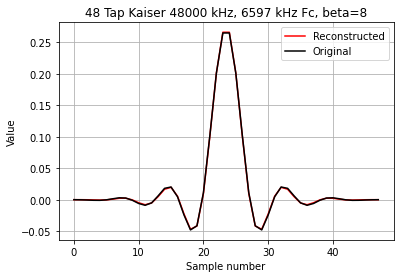

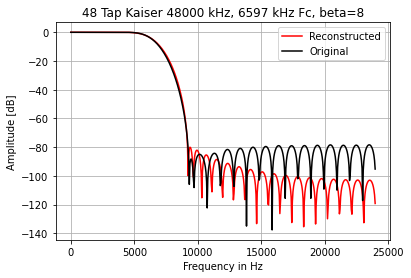

In [235]:
# coeffs48K_8K_LPF_FIR
ntaps = 48
window = 'kaiser'
fs = 48000
fc = 8000*np.pi/4*1.05
beta = 8
pp = signal.firwin(ntaps,fc,width=None,window=(window,beta),fs=fs)
w, h = signal.freqz(pp)
wo, ho = signal.freqz(coeffs48K_8K_LPF_FIR)

plt.figure()
plt.plot(pp,'r-',label='Reconstructed')
plt.plot(coeffs48K_8K_LPF_FIR,'k-',label='Original')
plt.legend()
plt.xlabel("Sample number")
plt.ylabel("Value")
plt.title("%d Tap Kaiser %d kHz, %d kHz Fc, beta=%d"%(ntaps,fs,fc,beta))
plt.grid()

plt.figure()
plt.plot(w/2/np.pi*fs, 20 * np.log10(abs(h)), 'r-',label='Reconstructed')
plt.plot(wo/2/np.pi*fs, 20 * np.log10(abs(ho)), 'k-',label='Original')
plt.legend()
plt.xlabel("Frequency in Hz")
plt.ylabel("Amplitude [dB]")
plt.title("%d Tap Kaiser %d kHz, %d kHz Fc, beta=%d"%(ntaps,fs,fc,beta))

plt.grid()

In [309]:
def plot_hilbert_response(coeffsp,coeffsn,fs,poslabel="+",neglabel="-",title="",yphaselim=[88,92],yamplim=[-110,5]):
    w90, h90 = signal.freqz(coeffsp)
    w0, h0 = signal.freqz(coeffsn)

    phasep = np.unwrap(np.angle(h90))
    phasen = np.unwrap(np.angle(h0))

    plt.figure(figsize=(16,5),facecolor='white')
    plt.subplot(1,2,1)
    plt.plot(w0*fs/(2*np.pi), 180/np.pi*(phasep-phasen), 'k-')
    plt.grid()
    plt.xlabel("Frequency in Hz")
    plt.ylabel("Phase diff [deg]")
    plt.ylim(yphaselim)
    plt.title(title)

    plt.subplot(1,2,2)
    plt.plot(w90*fs/(2*np.pi), 20 * np.log10(abs(h90)), 'k-',label=poslabel)
    plt.plot(w0*fs/(2*np.pi), 20 * np.log10(abs(h0)), 'r-',label=neglabel)
    plt.legend()
    plt.xlabel("Frequency in Hz")
    plt.ylabel("Amplitude [dB]")
    plt.grid()
    plt.title(title)
    plt.ylim(yamplim)

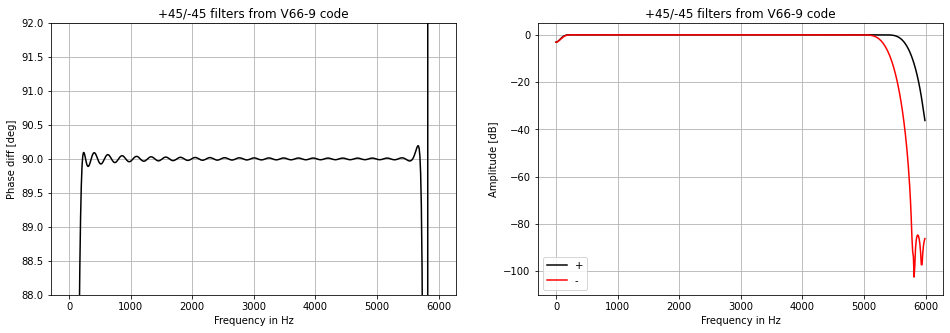

In [314]:
# AFP 02-17-25 278 576  12K
FIR_Hilbert_coeffs_45 = [0.000198724236183671,
 0.000254683831862001,
 0.000315458144123207,
 0.000368610207103309,
 0.000465506783939857,
 0.000511928039934757,
 0.000647299422206719,
 0.000698074642452268,
 0.000854171713729817,
 0.000945871414257390,
 0.001076408944312920,
 0.001275920792277492,
 0.001306915989978013,
 0.001703306484332476,
 0.001550515101469794,
 0.002227298340949841,
 0.001835463144518919,
 0.002820293580739281,
 0.002224274854022750,
 0.003419621857599474,
 0.002819842043365285,
 0.003926578130419233,
 0.003762668283074692,
 0.004216679139836836,
 0.005216147587106480,
 0.004163484463570267,
 0.007339230162553567,
 0.003675607102120641,
 0.010249150284403673,
 0.002743452714859422,
 0.013980372783435091,
 0.001489894753953287,
 0.018448562889854227,
 0.000219023228827659,
 0.023429266754326966,
-0.000538612578294005,
 0.028559517413246797,
 0.000026682439276827,
 0.033366738095610159,
 0.003106342852277801,
 0.037323748655479140,
 0.010557712182430569,
 0.039922600621868351,
 0.025820858117389513,
 0.040754864597457946,
 0.057491275979955001,
 0.039583257572973069,
 0.140431345936612995,
 0.036390015738706309,
 0.865063715035993996,
 0.031391300797281890,
-0.327903573861813014,
 0.025013429083301980,
-0.148898771042744293,
 0.017834389903486098,
-0.094047715083500544,
 0.010501189429832865,
-0.064304366997204127,
 0.003638357049891278,
-0.044513820587759587,
-0.002235624940045236,
-0.030331681178903912,
-0.006769427152121139,
-0.020066155186087276,
-0.009808208167348372,
-0.012834161617157508,
-0.011388784109210482,
-0.008006187994283959,
-0.011705147912663404,
-0.005030666033447775,
-0.011054188692668034,
-0.003395620019522265,
-0.009774147564620667,
-0.002641217575854609,
-0.008188042301640656,
-0.002384731896854369,
-0.006561415369602986,
-0.002339199541964768,
-0.005079300499545814,
-0.002318061252603545,
-0.003842514275124937,
-0.002225239010723332,
-0.002879421464156411,
-0.002034553450037827,
-0.002166978296109626,
-0.001764401144908235,
-0.001654383125037512,
-0.001453535333182090,
-0.001283804403268615,
-0.001142233712330263,
-0.001004797547016575,
-0.000860873307921386,
-0.000781417508646928,
-0.000625726502729441,
-0.000593026532750594,
-0.000440206606932182,
-0.000430981422416596,
-0.000299086415167579,
-0.000293666182366421,
-0.000193345055588135]

# Exite Hilbert transforms for 12K SPS BW 5400 100 taps AFP02-17-25
FIR_Hilbert_coeffs_neg_45 = [-0.000104828886628755,
-0.000117719664105387,
-0.000179320525624148,
-0.000205669060801986,
-0.000270286475558104,
-0.000332604968214234,
-0.000386819028473551,
-0.000493164616992682,
-0.000552187708486295,
-0.000674078778415017,
-0.000787897902733834,
-0.000880670533595121,
-0.001080992707313235,
-0.001168160302446560,
-0.001365286530613688,
-0.001636783384052048,
-0.001559963634144742,
-0.002356313266829644,
-0.001678217635730416,
-0.003240524231127448,
-0.001945858691780062,
-0.003970012170510779,
-0.002804622726618263,
-0.004094681623970159,
-0.004691992111496490,
-0.003369737266986447,
-0.007627097490107733,
-0.002195191592412418,
-0.010835260483481341,
-0.001845290685708202,
-0.012766336781617968,
-0.004153071025321154,
-0.011756607386998292,
-0.010556794294806793,
-0.007228189577834320,
-0.020846529514028617,
-0.000887005875166711,
-0.032318023634858514,
 0.002824775637078142,
-0.040051810693587799,
-0.002513661566225675,
-0.038562584732477104,
-0.023692311071245833,
-0.024291462351993202,
-0.067204321144781837,
 0.002221169819425520,
-0.145832963504399560,
 0.035705388989502325,
-0.352113137784848706,
 0.067646258294101688,
 0.819224519212560343,
 0.089389932910583753,
 0.083898046820836417,
 0.095487826549608398,
 0.005097439529971089,
 0.085709969555230026,
-0.010424760352139743,
 0.064811294048651949,
-0.003898907826858565,
 0.040265585480685734,
 0.008749537601820631,
 0.019155494269048438,
 0.018678233958939739,
 0.005700076331359550,
 0.022203747632268241,
 0.000410110361091821,
 0.019752962364774186,
 0.000933775296421688,
 0.014070217079109496,
 0.003844223553408773,
 0.008207357923911553,
 0.006337891834889198,
 0.004112629333540725,
 0.007109267624208683,
 0.002222779781756527,
 0.006264069949833283,
 0.001893005138071308,
 0.004640304124501774,
 0.002154680835501082,
 0.003076655796887437,
 0.002307279081475436,
 0.002003764398968816,
 0.002117456102702203,
 0.001427355620025981,
 0.001691149314908232,
 0.001139213958168955,
 0.001232148667634720,
 0.000938062422309971,
 0.000871368830893603,
 0.000732817577251988,
 0.000628578254366384,
 0.000526829579234758,
 0.000462087337619918,
 0.000353466739325737,
 0.000329895504555281,
 0.000229266229860308,
 0.000216471955570351,
 0.000146341941125966,
 0.000125349498762248,
 0.000088059239423163]

plot_hilbert_response(FIR_Hilbert_coeffs_45,FIR_Hilbert_coeffs_neg_45,12000,title="+45/-45 filters from V66-9 code")

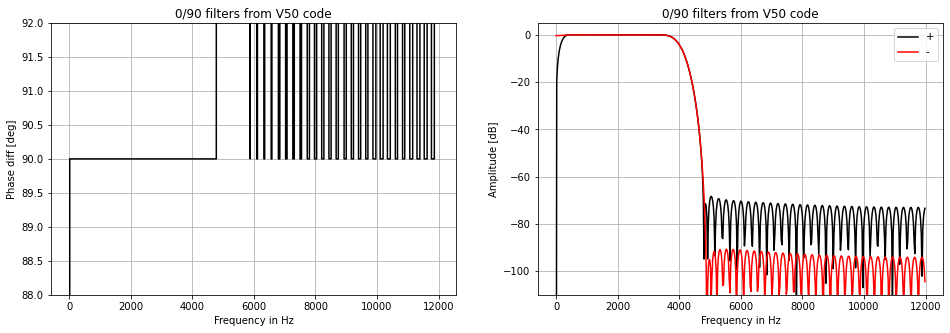

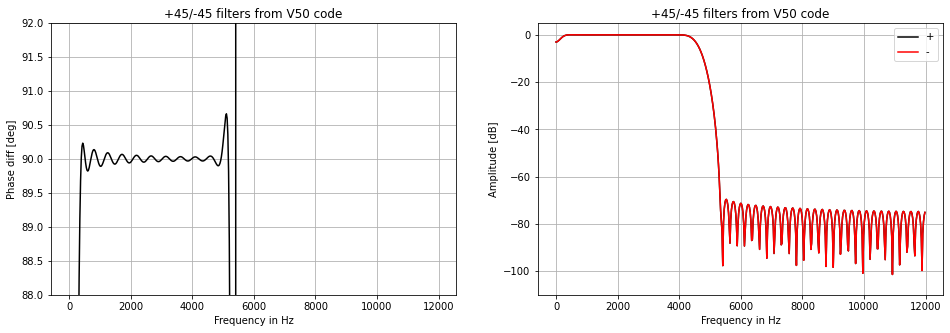

In [308]:
# From the version 50 code
FIR_Hilbert_coeffs90 =[
  0.000260541523452319,
  0.000350118329747025,
  0.000457309284506440,
  0.000550666198843645,
  0.000621266532617164,
  0.000702399574879364,
  0.000833621629096790,
  0.001008579978579176,
  0.001181787520004083,
  0.001336691933638389,
  0.001518157426438937,
  0.001761230434902183,
  0.002004996745563877,
  0.002150870469994603,
  0.002246823455544660,
  0.002536029463950925,
  0.003182829684106102,
  0.003927978573101222,
  0.004202277872401606,
  0.003807373425516359,
  0.003447512251616066,
  0.004228107332300186,
  0.006304876092928572,
  0.008188790426860106,
  0.007995508632383989,
  0.005802695801463896,
  0.004400087299902804,
  0.006764393635494333,
  0.012290214014457060,
  0.016216173071996593,
  0.014158292895093284,
  0.007770446495811664,
  0.004758021704084975,
  0.011353854946142534,
  0.024183432153374065,
  0.031370596247923904,
  0.024380988631609920,
  0.009451956297522695,
  0.004684212838220287,
  0.022041157587607826,
  0.051227120722328441,
  0.065025683671484189,
  0.046271464095288983,
  0.011955880355124973,
  0.006524078745803533,
  0.062779390676329164,
  0.162765120434825133,
  0.238167240025652926,
  0.218210452603941230,
  0.088750665959884859,
  -0.088750665959822631,
  -0.218210452603911864,
  -0.238167240025665833,
  -0.162765120434861799,
  -0.062779390676360208,
  -0.006524078745811551,
  -0.011955880355114410,
  -0.046271464095277062,
  -0.065025683671483744,
  -0.051227120722338385,
  -0.022041157587617679,
  -0.004684212838221822,
  -0.009451956297516920,
  -0.024380988631604168,
  -0.031370596247923828,
  -0.024183432153378877,
  -0.011353854946147131,
  -0.004758021704085584,
  -0.007770446495808990,
  -0.014158292895090831,
  -0.016216173071996857,
  -0.012290214014459445,
  -0.006764393635496396,
  -0.004400087299902848,
  -0.005802695801462308,
  -0.007995508632382435,
  -0.008188790426859825,
  -0.006304876092929479,
  -0.004228107332301279,
  -0.003447512251616466,
  -0.003807373425515973,
  -0.004202277872401006,
  -0.003927978573101041,
  -0.003182829684106520,
  -0.002536029463951589,
  -0.002246823455545033,
  -0.002150870469994419,
  -0.002004996745563344,
  -0.001761230434901778,
  -0.001518157426438980,
  -0.001336691933638780,
  -0.001181787520004439,
  -0.001008579978579209,
  -0.000833621629096556,
  -0.000702399574879159,
  -0.000621266532617202,
  -0.000550666198843870,
  -0.000457309284506622,
  -0.000350118329747015,
  -0.000260541523452174]

FIR_Hilbert_coeffs0 = [
  -0.000034918004089539,
  -0.000056560178566514,
  -0.000052200767643127,
  -0.000026702435819265,
  -0.000016118610793424,
  -0.000046120218554689,
  -0.000094769975310728,
  -0.000116244175573113,
  -0.000103473290693926,
  -0.000100468311685831,
  -0.000131812354041009,
  -0.000147013184803159,
  -0.000090087181803662,
  -0.000028815382013927,
  -0.000130280599690611,
  -0.000419515430562812,
  -0.000606321301994488,
  -0.000331056941269798,
  0.000300139432142323,
  0.000566732353892149,
  -0.000166044490609156,
  -0.001472218458794427,
  -0.001897124181971266,
  -0.000458573708716961,
  0.001785512110049791,
  0.002232229942562263,
  -0.000485343194436100,
  -0.004200442512099593,
  -0.004620525404678152,
  -0.000017436261833583,
  0.005644302396745906,
  0.005687524679594624,
  -0.001868146595360360,
  -0.010289280940579130,
  -0.009596634956298962,
  0.002243604145684917,
  0.014353686059934348,
  0.012131512687903003,
  -0.006273963691413258,
  -0.023793081566665507,
  -0.018950655623112697,
  0.009941949261887444,
  0.036267764431128099,
  0.026750408520418417,
  -0.022074628560615636,
  -0.068077807700227158,
  -0.050667742709827150,
  0.056076194411023878,
  0.210255362875255120,
  0.323239526764198870,
  0.323239526764221796,
  0.210255362875309104,
  0.056076194411075461,
  -0.050667742709804640,
  -0.068077807700235915,
  -0.022074628560636567,
  0.026750408520406936,
  0.036267764431133179,
  0.009941949261900019,
  -0.018950655623105956,
  -0.023793081566669486,
  -0.006273963691421998,
  0.012131512687898499,
  0.014353686059937327,
  0.002243604145691154,
  -0.009596634956295706,
  -0.010289280940581028,
  -0.001868146595364453,
  0.005687524679592587,
  0.005644302396747321,
  -0.000017436261830776,
  -0.004620525404676834,
  -0.004200442512100705,
  -0.000485343194438270,
  0.002232229942561012,
  0.001785512110050243,
  -0.000458573708715549,
  -0.001897124181970180,
  -0.001472218458794366,
  -0.000166044490609870,
  0.000566732353891429,
  0.000300139432142199,
  -0.000331056941269300,
  -0.000606321301993848,
  -0.000419515430562592,
  -0.000130280599690999,
  -0.000028815382014596,
  -0.000090087181804056,
  -0.000147013184802981,
  -0.000131812354040468,
  -0.000100468311685428,
  -0.000103473290693980,
  -0.000116244175573491,
  -0.000094769975311027,
  -0.000046120218554646,
  -0.000016118610793142,
  -0.000026702435819053,
  -0.000052200767643172,
  -0.000056560178566726,
  -0.000034918004089699]

FIR_Hilbert_coeffs_45 = [
  0.000208749169528193,
  0.000252370207237693,
  0.000316745972389264,
  0.000389779792743150,
  0.000458064393940245,
  0.000544292480304147,
  0.000670229405828862,
  0.000786540908706538,
  0.000824256687725277,
  0.000850883359980068,
  0.001054747477562578,
  0.001447583837983883,
  0.001697199286619339,
  0.001526100287236141,
  0.001276821596304339,
  0.001673420275574097,
  0.002745295815859153,
  0.003395676726993742,
  0.002718522288005151,
  0.001636278687327191,
  0.002199514905092365,
  0.004685367864774518,
  0.006401300322332724,
  0.004867776241026505,
  0.001893513774424435,
  0.002279923751772863,
  0.007288114580077518,
  0.011442427619731363,
  0.008851166096756839,
  0.002234174302571981,
  0.001432620975106147,
  0.010464130062008388,
  0.019640087371307593,
  0.016331734279683409,
  0.003329822861674142,
  -0.000952021347173749,
  0.014173837353909553,
  0.033417780121385486,
  0.031171727040209308,
  0.007063266354570037,
  -0.005975809757740907,
  0.019166278133298083,
  0.061566054966400184,
  0.067892683938993531,
  0.021047357767385529,
  -0.018980585416985298,
  0.033202559452715580,
  0.185745545601136375,
  0.332342504632370528,
  0.339108064135957732,
  0.176364078365928184,
  -0.044031981464391155,
  -0.170233800830846993,
  -0.147033972058953438,
  -0.049160650514893975,
  0.011486305082461946,
  -0.004266177344724905,
  -0.047590806811761290,
  -0.057016857341321406,
  -0.026827659627843559,
  0.001829971929970469,
  -0.000894575508665733,
  -0.022112937886184899,
  -0.030836306028080008,
  -0.017930544898457686,
  -0.001826130595550091,
  -0.000793321746811505,
  -0.011491373681206070,
  -0.017651034046476961,
  -0.012094944920703633,
  -0.003144014157533031,
  -0.001277848005882679,
  -0.006278431638571454,
  -0.009986616140575156,
  -0.007789839619533020,
  -0.003167986937692221,
  -0.001587098239810444,
  -0.003590754971013374,
  -0.005455469657528656,
  -0.004677297337442094,
  -0.002539265212587745,
  -0.001537729723433958,
  -0.002138023971581867,
  -0.002857546863776439,
  -0.002582224610556445,
  -0.001718788897037582,
  -0.001211578931066670,
  -0.001277456053086136,
  -0.001428029907730884,
  -0.001293238294804079,
  -0.000989763253319653,
  -0.000780977004334609,
  -0.000712672728680204,
  -0.000664127075026405,
  -0.000570869404132902,
  -0.000469972757694242,
  -0.000395167843914532,
  -0.000330916555227644,
  -0.000261564801895728,
  -0.000200782339450830]

FIR_Hilbert_coeffs_neg45 = [
  -0.000200782339451093,
  -0.000261564801895940,
  -0.000330916555227521,
  -0.000395167843914148,
  -0.000469972757693983,
  -0.000570869404133038,
  -0.000664127075026782,
  -0.000712672728680422,
  -0.000780977004334455,
  -0.000989763253319313,
  -0.001293238294803919,
  -0.001428029907731070,
  -0.001277456053086474,
  -0.001211578931066802,
  -0.001718788897037358,
  -0.002582224610556092,
  -0.002857546863776302,
  -0.002138023971581972,
  -0.001537729723433969,
  -0.002539265212587485,
  -0.004677297337441944,
  -0.005455469657529097,
  -0.003590754971014091,
  -0.001587098239810390,
  -0.003167986937691052,
  -0.007789839619532059,
  -0.009986616140576013,
  -0.006278431638573506,
  -0.001277848005883065,
  -0.003144014157530199,
  -0.012094944920700255,
  -0.017651034046477412,
  -0.011491373681210488,
  -0.000793321746814271,
  -0.001826130595546474,
  -0.017930544898451029,
  -0.030836306028079005,
  -0.022112937886192143,
  -0.000894575508672181,
  0.001829971929975418,
  -0.026827659627830250,
  -0.057016857341315903,
  -0.047590806811772829,
  -0.004266177344739693,
  0.011486305082468935,
  -0.049160650514860863,
  -0.147033972058925322,
  -0.170233800830864535,
  -0.044031981464460204,
  0.176364078365850496,
  0.339108064135926812,
  0.332342504632403446,
  0.185745545601197826,
  0.033202559452755007,
  -0.018980585416986880,
  0.021047357767364890,
  0.067892683938985218,
  0.061566054966411758,
  0.019166278133312641,
  -0.005975809757739608,
  0.007063266354560562,
  0.031171727040203111,
  0.033417780121389559,
  0.014173837353917354,
  -0.000952021347171707,
  0.003329822861669635,
  0.016331734279679325,
  0.019640087371308918,
  0.010464130062012798,
  0.001432620975108294,
  0.002234174302570266,
  0.008851166096754268,
  0.011442427619730999,
  0.007288114580079074,
  0.002279923751774035,
  0.001893513774424087,
  0.004867776241025558,
  0.006401300322332441,
  0.004685367864774981,
  0.002199514905092820,
  0.001636278687327238,
  0.002718522288005079,
  0.003395676726993898,
  0.002745295815859428,
  0.001673420275574142,
  0.001276821596304062,
  0.001526100287235825,
  0.001697199286619311,
  0.001447583837984171,
  0.001054747477562883,
  0.000850883359980071,
  0.000824256687724973,
  0.000786540908706255,
  0.000670229405828929,
  0.000544292480304527,
  0.000458064393940559,
  0.000389779792743090,
  0.000316745972388931,
  0.000252370207237460,
  0.000208749169528268]

plot_hilbert_response(FIR_Hilbert_coeffs90,FIR_Hilbert_coeffs0,24000,title="0/90 filters from V50 code")
plot_hilbert_response(FIR_Hilbert_coeffs_45,FIR_Hilbert_coeffs_neg45,24000,title="+45/-45 filters from V50 code")

Text(0.5, 1.0, '"0" degree Hilbert filter')

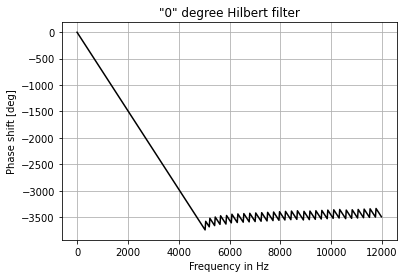

In [318]:
w0, h0 = signal.freqz(FIR_Hilbert_coeffs0)
w90, h90 = signal.freqz(FIR_Hilbert_coeffs90)

phasen = np.unwrap(np.angle(h0))
phasep = np.unwrap(np.angle(h90))
plt.figure(facecolor='white')
plt.plot(w0*fs/(2*np.pi), 180/np.pi*(phasen), 'k-')
plt.grid()
plt.xlabel("Frequency in Hz")
plt.ylabel("Phase shift [deg]")
plt.title('"0" degree Hilbert filter')



Text(0.5, 1.0, '"0" and "90" degree Hilbert filters')

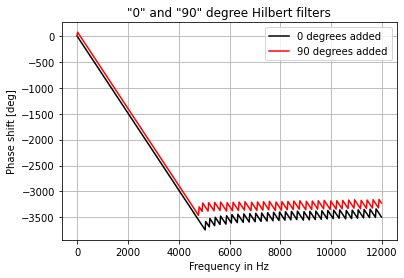

In [320]:
plt.figure(facecolor='white')
plt.plot(w0*fs/(2*np.pi), 180/np.pi*(phasen), 'k-',label='0 degrees added')
plt.plot(w90*fs/(2*np.pi), 180/np.pi*(phasep), 'r-',label='90 degrees added')
plt.grid()
plt.xlabel("Frequency in Hz")
plt.ylabel("Phase shift [deg]")
plt.legend()
plt.title('"0" and "90" degree Hilbert filters')

(89.9, 90.1)

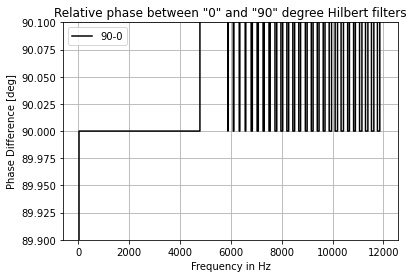

In [325]:
plt.figure(facecolor='white')
plt.plot(w90*fs/(2*np.pi), 180/np.pi*(phasep-phasen), 'k-',label='90-0')
plt.grid()
plt.xlabel("Frequency in Hz")
plt.ylabel("Phase Difference [deg]")
plt.legend()
plt.title('Relative phase between "0" and "90" degree Hilbert filters')
plt.ylim([89.9,90.1])

/tmp/ipykernel_862591/5763552.py:2: RuntimeWarning: divide by zero encountered in divide
  ps = (-50/24000)/(1/f)*2*np.pi
/tmp/ipykernel_862591/5763552.py:5: RuntimeWarning: divide by zero encountered in divide
  ps = (-49/24000)/(1/f)*2*np.pi


Text(0.5, 1.0, 'Sampled at 24,000 samples per second')

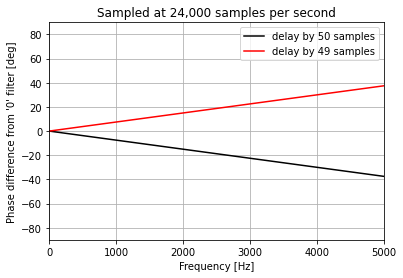

In [357]:
f = w0*fs/(2*np.pi)
ps = (-50/24000)/(1/f)*2*np.pi
plt.figure(facecolor='white')
plt.plot(f,ps*180/np.pi-180/np.pi*(phasen),'k-',label='delay by 50 samples')
ps = (-49/24000)/(1/f)*2*np.pi
plt.plot(f,ps*180/np.pi-180/np.pi*(phasen),'r-',label='delay by 49 samples')

#plt.plot(w0*fs/(2*np.pi), 180/np.pi*(phasen), 'r-')
plt.xlim([0,5000])
plt.ylim([-90,90])
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase difference from '0' filter [deg]")
plt.grid()
plt.title("Sampled at 24,000 samples per second")

/tmp/ipykernel_862591/3430794917.py:2: RuntimeWarning: divide by zero encountered in divide
  ps = (-50/192000)/(1/f)*2*np.pi
/tmp/ipykernel_862591/3430794917.py:5: RuntimeWarning: divide by zero encountered in divide
  ps2 = (-49/192000)/(1/f)*2*np.pi
/tmp/ipykernel_862591/3430794917.py:7: RuntimeWarning: divide by zero encountered in divide
  ps3 = (-49.5/192000)/(1/f)*2*np.pi


Text(0.5, 1.0, 'Sampled at 192,000 samples per second')

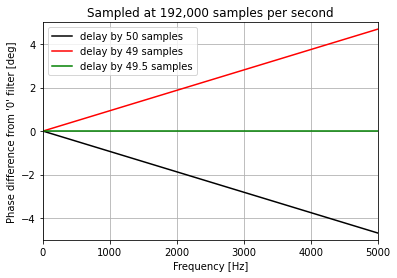

In [364]:
f = w0*192000/(2*np.pi)
ps = (-50/192000)/(1/f)*2*np.pi
plt.figure(facecolor='white')
plt.plot(f,ps*180/np.pi-180/np.pi*(phasen),'k-',label='delay by 50 samples')
ps2 = (-49/192000)/(1/f)*2*np.pi
plt.plot(f,ps2*180/np.pi-180/np.pi*(phasen),'r-',label='delay by 49 samples')
ps3 = (-49.5/192000)/(1/f)*2*np.pi
plt.plot(f,ps3*180/np.pi-180/np.pi*(phasen),'g-',label='delay by 49.5 samples')


#plt.plot(w0*fs/(2*np.pi), 180/np.pi*(phasen), 'r-')
plt.xlim([0,5000])
plt.ylim([-5,5])
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase difference from '0' filter [deg]")
plt.grid()
plt.title("Sampled at 192,000 samples per second")

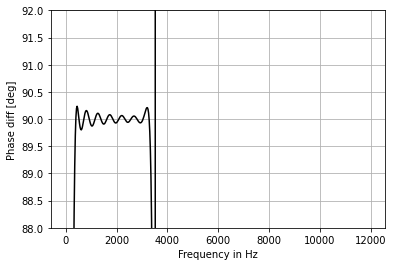

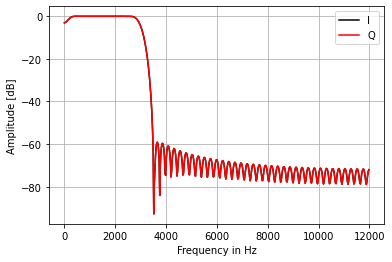

In [298]:
# Design a Hilbert bandpass filter pair

# I need to generate the passband i want and add the phase difference there.
# then take an FFT to get the window samples.
ppos = [0.000371322185130901,
 0.000294337316233193,
 0.000120614662466920,
-5.913310370763830E-6,
 0.000094076104322326,
 0.000500372137344979,
 0.001087152528068761,
 0.001543729183546263,
 0.001550396400357597,
 0.001022823962908059,
 0.000256615718329498,
-0.000170948280977730,
 0.000258525963860551,
 0.001606189467459562,
 0.003299655396708811,
 0.004370037583269849,
 0.004039957821365964,
 0.002327875734081122,
 0.000238456038558657,
-0.000698646253318689,
 0.000629459419417100,
 0.004048048561898673,
 0.007921114881705573,
 0.009951353320217888,
 0.008611970046693914,
 0.004358317443381994,
-0.000258277593044300,
-0.001879062287316528,
 0.001561793635874870,
 0.009183505191689556,
 0.017154560946322575,
 0.020665519173439111,
 0.016947826586180517,
 0.007536475225329380,
-0.001864978168245224,
-0.004291375647259128,
 0.004168295176419313,
 0.021173974645146722,
 0.038334872779643897,
 0.045351820161913720,
 0.036280373653132178,
 0.014462891105812600,
-0.007114006604890081,
-0.011102766236561534,
 0.015327221563184152,
 0.072405450754194467,
 0.144995574631874014,
 0.207309883649430815,
 0.233494267143935869,
 0.209273861763109581,
 0.138991227490401104,
 0.044428316405943330,
-0.044210798739040519,
-0.100922421225865103,
-0.114179998118025094,
-0.090211430148748203,
-0.048204866314650235,
-0.010322628190173102,
 0.008315458157354063,
 0.004975785594041981,
-0.011951614033492909,
-0.029282477167570684,
-0.036573402021339248,
-0.030918107601413454,
-0.017015864311281131,
-0.003255452318567913,
 0.003472014656871863,
 0.001262658410381134,
-0.006607330441522889,
-0.014352525218713923,
-0.017285485090239840,
-0.014221159551225790,
-0.007541585568913668,
-0.001264981175128070,
 0.001476578751279104,
 0.000040234585998310,
-0.003792531083599944,
-0.007233073584585178,
-0.008225796657631488,
-0.006471081562264570,
-0.003275442521782880,
-0.000520747837556516,
 0.000503315560371394,
-0.000286493820958980,
-0.001953653231065047,
-0.003271216619281111,
-0.003471721610642133,
-0.002583937988863427,
-0.001246534321757239,
-0.000213711272485736,
 0.000097373578244929,
-0.000234806176236011,
-0.000798032966393623,
-0.001161691391320540,
-0.001125956638203775,
-0.000774980519526625,
-0.000351306345937701,
-0.000071306176109264,
-7.066089706554570E-6,
-0.000087818596544747]

pneg = [-0.000087818596544788,
-7.066089706554370E-6,
-0.000071306176109194,
-0.000351306345937571,
-0.000774980519526497,
-0.001125956638203733,
-0.001161691391320641,
-0.000798032966393841,
-0.000234806176236226,
 0.000097373578244872,
-0.000213711272485549,
-0.001246534321756876,
-0.002583937988863098,
-0.003471721610642083,
-0.003271216619281446,
-0.001953653231065613,
-0.000286493820959408,
 0.000503315560371483,
-0.000520747837555795,
-0.003275442521781828,
-0.006471081562263803,
-0.008225796657631592,
-0.007233073584586301,
-0.003792531083601577,
 0.000040234585997137,
 0.001476578751279277,
-0.001264981175126353,
-0.007541585568911171,
-0.014221159551223918,
-0.017285485090239840,
-0.014352525218716038,
-0.006607330441525987,
 0.001262658410379065,
 0.003472014656872562,
-0.003255452318564187,
-0.017015864311276066,
-0.030918107601409967,
-0.036573402021339851,
-0.029282477167575701,
-0.011951614033499761,
 0.004975785594037840,
 0.008315458157356789,
-0.010322628190162398,
-0.048204866314634935,
-0.090211430148735436,
-0.114179998118022721,
-0.100922421225878023,
-0.044210798739067782,
 0.044428316405908830,
 0.138991227490370045,
 0.209273861763091790,
 0.233494267143936313,
 0.207309883649447579,
 0.144995574631899438,
 0.072405450754218781,
 0.015327221563199562,
-0.011102766236557817,
-0.007114006604895509,
 0.014462891105803823,
 0.036280373653125878,
 0.045351820161913012,
 0.038334872779648276,
 0.021173974645153078,
 0.004168295176424049,
-0.004291375647258075,
-0.001864978168247571,
 0.007536475225325707,
 0.016947826586177942,
 0.020665519173439024,
 0.017154560946324719,
 0.009183505191692476,
 0.001561793635876881,
-0.001879062287316348,
-0.000258277593045727,
 0.004358317443380023,
 0.008611970046692575,
 0.009951353320217810,
 0.007921114881706586,
 0.004048048561900055,
 0.000629459419418066,
-0.000698646253318533,
 0.000238456038558128,
 0.002327875734080381,
 0.004039957821365492,
 0.004370037583269863,
 0.003299655396709204,
 0.001606189467460030,
 0.000258525963860813,
-0.000170948280977775,
 0.000256615718329242,
 0.001022823962907788,
 0.001550396400357472,
 0.001543729183546326,
 0.001087152528068941,
 0.000500372137345159,
 0.000094076104322418,
-5.913310370777120E-6,
 0.000120614662466843,
 0.000294337316233114,
 0.000371322185130858]

ntaps = 100
window = 'kaiser'
fs = 24000
beta = 8

#pp = signal.firwin(ntaps,[0.01*6000,0.9*6000],pass_zero=False,window=(window,beta),fs=fs)
#pp2 = signal.firwin(ntaps,[0.01*6000,0.9*6000],pass_zero=False,window=(window,beta),fs=fs)
w, h = signal.freqz(ppos)
w2, h2 = signal.freqz(pneg)

phasep = np.unwrap(np.angle(h))
phasen = np.unwrap(np.angle(h2))

plt.figure()
plt.plot(w*fs/(2*np.pi), 180/np.pi*(phasep-phasen), 'k-')
plt.grid()
plt.xlabel("Frequency in Hz")
plt.ylabel("Phase diff [deg]")
plt.ylim([88,92])

plt.figure()
plt.plot(w*fs/(2*np.pi), 20 * np.log10(abs(h)), 'k-',label='I')
plt.plot(w2*fs/(2*np.pi), 20 * np.log10(abs(h2)), 'r-',label='Q')
plt.legend()
plt.xlabel("Frequency in Hz")
plt.ylabel("Amplitude [dB]")
plt.grid()


/tmp/ipykernel_862591/2635030247.py:106: RuntimeWarning: divide by zero encountered in divide
  phase0 = (-49/fs)/(1/f)*2*np.pi


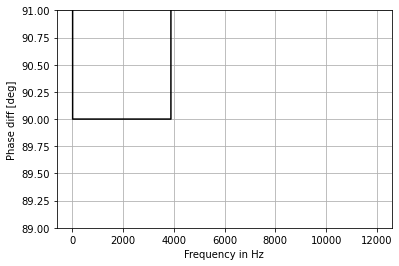

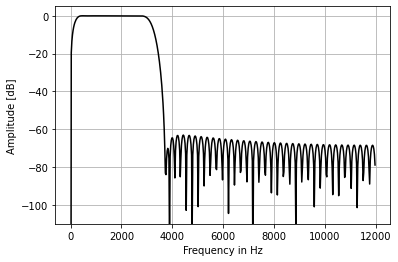

In [380]:
 pos90 = [0.000484476277364492,
 0.000623666886358707,
 0.000579763275400318,
 0.000371821979782864,
 0.000191614890195994,
 0.000303366916577257,
 0.000835822487565740,
 0.001615091864423641,
 0.002202284461134111,
 0.002174318644009815,
 0.001486790072456552,
 0.000636156641431837,
 0.000422424724059040,
 0.001390128794730368,
 0.003314963952708015,
 0.005167797124410222,
 0.005714656681309858,
 0.004438381577111123,
 0.002129673660241404,
 0.000597623724839349,
 0.001514389549956340,
 0.005093102462085016,
 0.009588551026266523,
 0.012192123958863549,
 0.010939754468192160,
 0.006390676965239009,
 0.001748589510078883,
 0.001008079254247336,
 0.006120892105793176,
 0.015115645140973600,
 0.022771952244278540,
 0.023855079087731091,
 0.017014691758282650,
 0.006594811093588303,
 0.000611828645692859,
 0.005628041025661262,
 0.021643221322730968,
 0.040708428192117542,
 0.051009685044439909,
 0.044631142361116052,
 0.024300148107976288,
 0.004245144557944962,
 0.003394789507594336,
 0.033910370607922021,
 0.091555662076567762,
 0.154228605458484352,
 0.190796853274247863,
 0.176413075142998838,
 0.106270632906045229,
-71.74135701549840E-15,
-0.106270632906164064,
-0.176413075143055070,
-0.190796853274231626,
-0.154228605458416212,
-0.091555662076486313,
-0.033910370607863720,
-0.003394789507576896,
-0.004245144557962373,
-0.024300148108006597,
-0.044631142361136050,
-0.051009685044437828,
-0.040708428192097163,
-0.021643221322706359,
-0.005628041025646536,
-0.000611828645693857,
-0.006594811093600595,
-0.017014691758296001,
-0.023855079087736607,
-0.022771952244273808,
-0.015115645140962966,
-0.006120892105783898,
-0.001008079254244581,
-0.001748589510082895,
-0.006390676965245808,
-0.010939754468196738,
-0.012192123958863162,
-0.009588551026261995,
-0.005093102462079632,
-0.001514389549953364,
-0.000597623724840031,
-0.002129673660244578,
-0.004438381577114369,
-0.005714656681311217,
-0.005167797124409275,
-0.003314963952705806,
-0.001390128794728444,
-0.000422424724058394,
-0.000636156641432444,
-0.001486790072457634,
-0.002174318644010515,
-0.002202284461134045,
-0.001615091864423021,
-0.000835822487565078,
-0.000303366916576969,
-0.000191614890196161,
-0.000371821979783273,
-0.000579763275400673,
-0.000623666886358832,
-0.000484476277364400]
    
w, h = signal.freqz(pos90)
phasep = np.unwrap(np.angle(h))

fs = 24000
f = w*fs/(2*np.pi)
phase0 = (-49/fs)/(1/f)*2*np.pi

plt.figure()
plt.plot(w*fs/(2*np.pi), 180/np.pi*(phasep-phase0),'k-')
#plt.plot(w*fs/(2*np.pi), 180/np.pi*phase0, 'r-')
plt.grid()
plt.xlabel("Frequency in Hz")
plt.ylabel("Phase diff [deg]")
plt.ylim([89,91])

plt.figure()
plt.plot(w*fs/(2*np.pi), 20 * np.log10(abs(h)), 'k-',label='Filter')
#plt.legend()
plt.xlabel("Frequency in Hz")
plt.ylabel("Amplitude [dB]")
plt.ylim([-110,5])
plt.grid()